In [30]:
from Bio.PDB import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

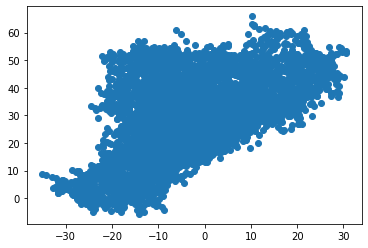

In [31]:
parser = MMCIFParser()
structure = parser.get_structure("myFile", "1dg3.cif")
chain = structure[0]['A'] 
chain.get_atoms()

lst = []
for atom in chain.get_atoms():
    lst.append(atom.get_coord())
    #print(atom.get_coord())
    
coor = np.vstack(lst)
x = coor[:, 0]
y = coor[:, 1]
z = coor[:, 2]

plt.scatter(x, y)

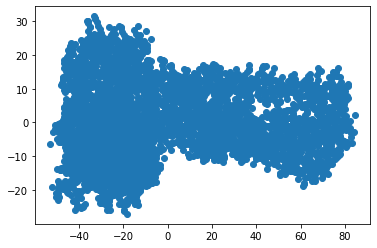

In [36]:
pca = PCA(n_components=2)
new_coor = pca.fit_transform(coor)
new_x = new_coor[:, 0]
new_y = new_coor[:, 1]

plt.scatter(new_x, new_y)